In [27]:
import pandas_datareader.data as web
import yfinance as yf
import numpy as np 
import matplotlib.pyplot as plt
import pandas_datareader as data

In [28]:
start ='2012-01-01'
end = '2022-11-05'
yf.pdr_override()

df=web.DataReader('TSLA',start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03 00:00:00-05:00,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
2012-01-04 00:00:00-05:00,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2012-01-05 00:00:00-05:00,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
2012-01-06 00:00:00-05:00,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
2012-01-09 00:00:00-05:00,1.800000,1.832667,1.741333,1.816667,1.816667,13455000


In [29]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-31 00:00:00-04:00,226.190002,229.850006,221.940002,227.539993,227.539993,61554300
2022-11-01 00:00:00-04:00,234.050003,237.399994,227.279999,227.820007,227.820007,62688800
2022-11-02 00:00:00-04:00,226.039993,227.869995,214.820007,214.979996,214.979996,63070300
2022-11-03 00:00:00-04:00,211.360001,221.199997,210.139999,215.309998,215.309998,56538800
2022-11-04 00:00:00-04:00,222.600006,223.800003,203.080002,207.470001,207.470001,98622200


In [30]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03 00:00:00-05:00,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
1,2012-01-04 00:00:00-05:00,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2,2012-01-05 00:00:00-05:00,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
3,2012-01-06 00:00:00-05:00,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
4,2012-01-09 00:00:00-05:00,1.800000,1.832667,1.741333,1.816667,1.816667,13455000


In [31]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1.929333,1.966667,1.843333,1.872000,13921500
1,1.880667,1.911333,1.833333,1.847333,9451500
2,1.850667,1.862000,1.790000,1.808000,15082500
3,1.813333,1.852667,1.760667,1.794000,14794500
4,1.800000,1.832667,1.741333,1.816667,13455000


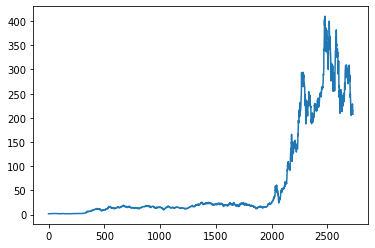

In [32]:
plt.plot(df.Close)

In [33]:
df


,Open,High,Low,Close,Volume
0,1.929333,1.966667,1.843333,1.872000,13921500
1,1.880667,1.911333,1.833333,1.847333,9451500
2,1.850667,1.862000,1.790000,1.808000,15082500
3,1.813333,1.852667,1.760667,1.794000,14794500
4,1.800000,1.832667,1.741333,1.816667,13455000
...,...,...,...,...,...
2725,226.190002,229.850006,221.940002,227.539993,61554300
2726,234.050003,237.399994,227.279999,227.820007,62688800
2727,226.039993,227.869995,214.820007,214.979996,63070300
2728,211.360001,221.199997,210.139999,215.309998,56538800


In [34]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2725    260.292201
2726    260.173334
2727    260.000834
2728    259.996568
2729    259.862368
Name: Close, Length: 2730, dtype: float64

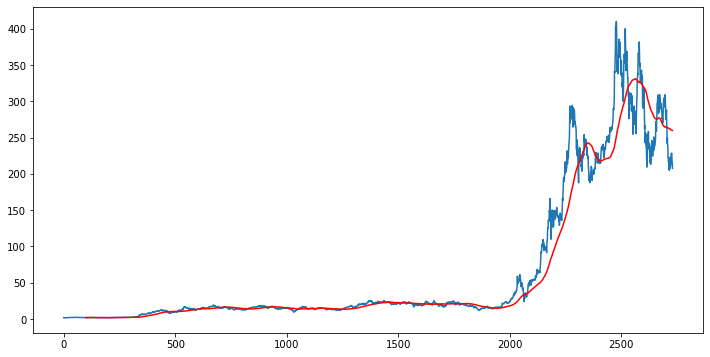

In [35]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r',label='Closing price')

In [36]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2725    277.723267
2726    277.113017
2727    276.470400
2728    275.887534
2729    275.264434
Name: Close, Length: 2730, dtype: float64

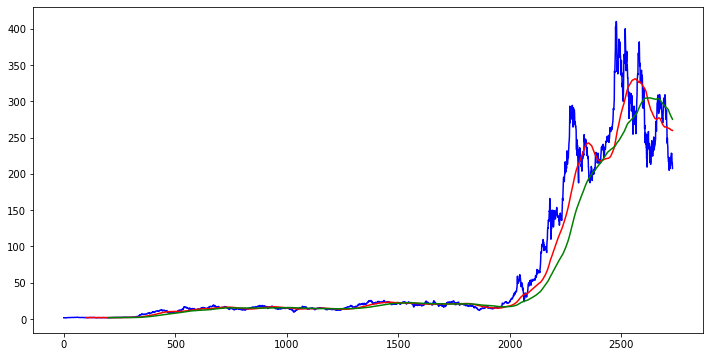

In [37]:
plt.figure(figsize = (12,6))
plt.plot(df.Close,'b',label='closing price')
plt.plot(ma100,'r',label='100 days')
plt.plot(ma200,'g',label='200 days')

In [38]:
df.shape

(2730, 5)

In [39]:
# Splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1910, 1)
(820, 1)


In [40]:
data_training.head()

,Close
0,1.872000
1,1.847333
2,1.808000
3,1.794000
4,1.816667


In [41]:
data_testing.head()

,Close
1910,15.561333
1911,15.886667
1912,15.667333
1913,15.267333
1914,15.666667


In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [43]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0146048 ],
       [0.01358328],
       [0.0119544 ],
       ...,
       [0.58405345],
       [0.5674332 ],
       [0.57414204]])

In [44]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i , 0])
    
x_train,y_train = np.array(x_train),np.array(y_train)

In [45]:
x_train.shape

(1810, 100, 1)

In [46]:
#ML Model


In [47]:

from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [48]:
model = Sequential()
model.add(LSTM(units=50,activation ='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation ='relu',return_sequences=True))
model.add(Dropout(0.3))



model.add(LSTM(units=80,activation ='relu',return_sequences=True))
model.add(Dropout(0.4))



model.add(LSTM(units=50,activation ='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [50]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
57/57 [==============================] - 29s 259ms/step - loss: 0.0689
Epoch 2/50
57/57 [==============================] - 16s 277ms/step - loss: 0.0253
Epoch 3/50
57/57 [==============================] - 13s 223ms/step - loss: 0.0211
Epoch 4/50
57/57 [==============================] - 14s 239ms/step - loss: 0.0202
Epoch 5/50
57/57 [==============================] - 15s 255ms/step - loss: 0.0201
Epoch 6/50
57/57 [==============================] - 13s 235ms/step - loss: 0.0179
Epoch 7/50
57/57 [==============================] - 15s 262ms/step - loss: 0.0153
Epoch 8/50
57/57 [==============================] - 14s 254ms/step - loss: 0.0163
Epoch 9/50
57/57 [==============================] - 14s 252ms/step - loss: 0.0136
Epoch 10/50
57/57 [==============================] - 14s 253ms/step - loss: 0.0145
Epoch 11/50
57/57 [==============================] - 14s 245ms/step - loss: 0.0139
Epoch 12/50
57/57 [==============================] - 16s 274ms/step - loss: 0.0120
Epoch 13/50
5

In [51]:
data_testing.head()

,Close
1910,15.561333
1911,15.886667
1912,15.667333
1913,15.267333
1914,15.666667


In [52]:
data_training.tail()

,Close
1905,16.107332
1906,15.590000
1907,15.622667
1908,15.221333
1909,15.383333


In [53]:
past_100_days = data_training.tail(100)

In [54]:
final_df=past_100_days.append(data_testing,ignore_index = True)

C:\Users\SARTHAK\AppData\Local\Temp\ipykernel_25872\49834949.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index = True)


In [55]:
final_df.head()

,Close
0,18.362000
1,17.966000
2,17.831333
3,18.240000
4,18.268000


In [56]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01615588],
       [0.01516101],
       [0.01482268],
       [0.01584938],
       [0.01591973],
       [0.01433026],
       [0.01364189],
       [0.01487293],
       [0.01605539],
       [0.01669017],
       [0.01689786],
       [0.01845885],
       [0.01790613],
       [0.01889934],
       [0.0148746 ],
       [0.01607717],
       [0.01578239],
       [0.01563332],
       [0.0162614 ],
       [0.0149818 ],
       [0.0148612 ],
       [0.01464012],
       [0.01580919],
       [0.01545244],
       [0.01579244],
       [0.01403214],
       [0.01422475],
       [0.01334711],
       [0.01149972],
       [0.0094078 ],
       [0.010468  ],
       [0.01000238],
       [0.00921854],
       [0.01090849],
       [0.01273913],
       [0.01279105],
       [0.01140425],
       [0.01103243],
       [0.01055342],
       [0.0101414 ],
       [0.00804612],
       [0.00893381],
       [0.00887351],
       [0.00826721],
       [0.00536967],
       [0.00442001],
       [0.00437311],
       [0.002

In [57]:
input_data.shape

(920, 1)

In [58]:
x_test =[]
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i , 0])

In [59]:
x_test,y_test = np.array(x_test),np.array(y_test)

In [60]:
print(x_test.shape)
print(y_test.shape)

(820, 100, 1)
(820,)


In [61]:
#Making predictions

In [62]:
y_predicted = model.predict(x_test)

26/26 [==============================] - 5s 87ms/step


In [63]:
y_predicted.shape

(820, 1)

In [64]:
y_test

array([0.00911972, 0.00993706, 0.00938602, 0.0083811 , 0.00938435,
       0.00680838, 0.00614178, 0.00686198, 0.00801597, 0.00785351,
       0.00701105, 0.00723213, 0.00543163, 0.00603459, 0.0058805 ,
       0.00613341, 0.00715844, 0.00781164, 0.00771115, 0.00698592,
       0.00847656, 0.00811981, 0.00884671, 0.00947479, 0.01141095,
       0.01120494, 0.01109273, 0.01069243, 0.01102405, 0.01080633,
       0.01132721, 0.01032563, 0.0104278 , 0.00740967, 0.00832918,
       0.01065056, 0.01057854, 0.01036751, 0.01100731, 0.01074603,
       0.0090544 , 0.00878642, 0.00983992, 0.01023016, 0.01098051,
       0.01101568, 0.01154327, 0.01306238, 0.01321815, 0.01352968,
       0.0139015 , 0.01306071, 0.01248288, 0.01283125, 0.01268051,
       0.02021747, 0.0249825 , 0.02491216, 0.02298772, 0.02278506,
       0.02276998, 0.02250033, 0.02319708, 0.02315521, 0.02472289,
       0.02622358, 0.02649156, 0.0278231 , 0.02863374, 0.02799393,
       0.0285366 , 0.02900891, 0.02864378, 0.03023995, 0.02901

In [65]:
y_predicted


array([[0.01792267],
       [0.01791516],
       [0.01788959],
       [0.01785111],
       [0.01780322],
       [0.01774815],
       [0.01768726],
       [0.01761797],
       [0.01753774],
       [0.01744711],
       [0.01734915],
       [0.0172466 ],
       [0.01714107],
       [0.01703337],
       [0.01692215],
       [0.01680726],
       [0.01668921],
       [0.01657   ],
       [0.01645362],
       [0.01634458],
       [0.01624575],
       [0.01615876],
       [0.01608607],
       [0.01602903],
       [0.01598918],
       [0.01596922],
       [0.01597276],
       [0.01600131],
       [0.016054  ],
       [0.01612815],
       [0.0162203 ],
       [0.01632652],
       [0.01644301],
       [0.0165647 ],
       [0.01668546],
       [0.01679629],
       [0.01689318],
       [0.01697731],
       [0.01705062],
       [0.01711562],
       [0.01717517],
       [0.01722997],
       [0.01727805],
       [0.01731762],
       [0.01734912],
       [0.01737475],
       [0.01739755],
       [0.017

In [66]:
scaler.scale_

array([0.00251232])

In [67]:
scale_factor=1/0.00721059
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

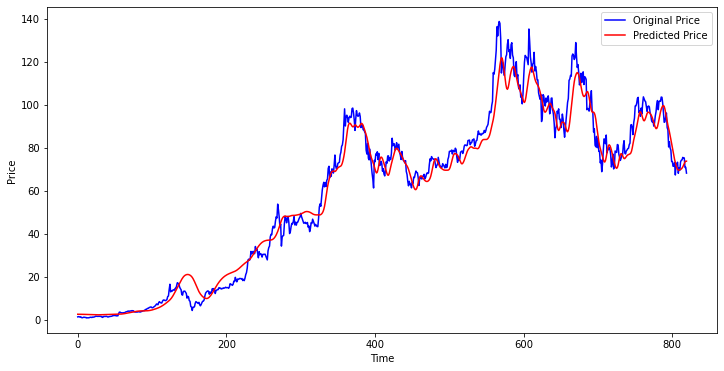

In [68]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label ='Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()